In [3]:
#Импорт библиотек, открытие файла
import pandas as pd
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor


In [4]:
#Cовмещаем два файла в один DataSet
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()
df_train.head().append(df_train.tail())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#Совмещаем train и test
df = pd.concat([df_train, df_test], axis=0)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [6]:
nan = df.loc[:, df.isnull().any()].copy()
nan

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
0,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0
1,RL,80.0,NaN,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,...,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0
2,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0
3,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,...,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0
4,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,WD,NaN
1455,RM,21.0,NaN,AllPub,CemntBd,CmentBd,None,0.0,TA,TA,...,Unf,1.0,286.0,TA,TA,NaN,NaN,NaN,WD,NaN
1456,RL,160.0,NaN,AllPub,VinylSd,VinylSd,None,0.0,TA,TA,...,Unf,2.0,576.0,TA,TA,NaN,NaN,NaN,WD,NaN
1457,RL,62.0,NaN,AllPub,HdBoard,Wd Shng,None,0.0,Gd,TA,...,NaN,0.0,0.0,NaN,NaN,NaN,MnPrv,Shed,WD,NaN


In [7]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
#Замена пустых значений
df_train['Alley'].fillna('no access', inplace=True)
df_train['BsmtQual'].fillna('no basement', inplace=True)
df_train['BsmtCond'].fillna('no basement', inplace=True)
df_train['BsmtFinType1'].fillna('no basement', inplace=True)
df_train['BsmtFinType2'].fillna('no basement', inplace=True)
df_train['FireplaceQu'].fillna('no Fireplace', inplace=True)
df_train['GarageType'].fillna('no Garage', inplace=True)
df_train['GarageFinish'].fillna('no Garage', inplace=True)
df_train['GarageQual'].fillna('no Garage', inplace=True)
df_train['GarageCond'].fillna('no Garage', inplace=True)
df_train['PoolQC'].fillna('no Pool', inplace=True)
df_train['Fence'].fillna('no Fence', inplace=True)
df_train['MasVnrType'].fillna('no type', inplace=True)
df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['BsmtExposure'].fillna('no exposure', inplace=True)
df_train['MiscFeature'].fillna('none', inplace=True)
df_train['Electrical'].fillna('SBrkr', inplace=True)
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean(), inplace=True)

In [9]:
df_train['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [10]:
#Избавляемся от столбцов, где NAN более 10%. А там где меньше заполняем средними значениямия
null_cols = []
zero_cols = []
for col in df_train.columns:
    nans_percent = sum(df_train[col].isna()) / len(df_train) * 100
    if df_train[col].sum() ==0:
        zero_cols.append(col)
    if nans_percent > 10:
        null_cols.append(col)
    null_cols.extend(zero_cols)
    
df_common_fin = df_train.drop(null_cols, axis=1)
    
for col in df_common_fin.columns:
    if df_common_fin[col].isna().sum() != 0:
        df_common_fin[col] = df_common_fin[col].fillna(df_common_fin[col].mean())

In [11]:
#Исследование фичей по типу
list_colums_with_str = df.columns.to_series().groupby(df.dtypes).groups
list_colums_with_str = {k.name: v for k, v in list_colums_with_str.items()}
list_colums_with_str

{'int64': Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
        'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold'],
       dtype='object'),
 'float64': Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'SalePrice'],
       dtype='object'),
 'object': Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', '

In [12]:
#Соединение таблице и кодирование категориальных признаков с помощью get_dummies
df_ext = pd.concat(
    [df_train.drop(list_colums_with_str['object'], axis=1),
     pd.get_dummies(df_train[list_colums_with_str['object']], prefix=list_colums_with_str['object'])],
    axis=1)

In [13]:
df_ext

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [14]:
#Проверка на отсутствие пустых значений
nans = df_train.loc[:, df_train.isnull().any()].copy()
nans

""
0
1
2
3
4
...
1455
1456
1457
1458


In [15]:
df_common_fin

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,no access,IR1,Lvl,AllPub,...,0,no Pool,no Fence,none,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,MnPrv,none,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,no access,Reg,Lvl,AllPub,...,0,no Pool,no Fence,none,0,4,2010,WD,Normal,142125


/home/anna/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


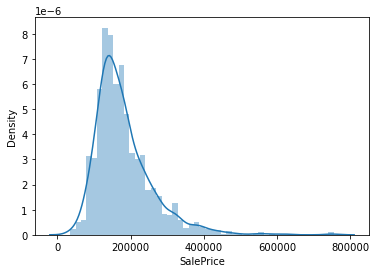

In [16]:
#Вывод графика на распредение стоимости домов
sns.distplot(df_train['SalePrice']);

<AxesSubplot:>

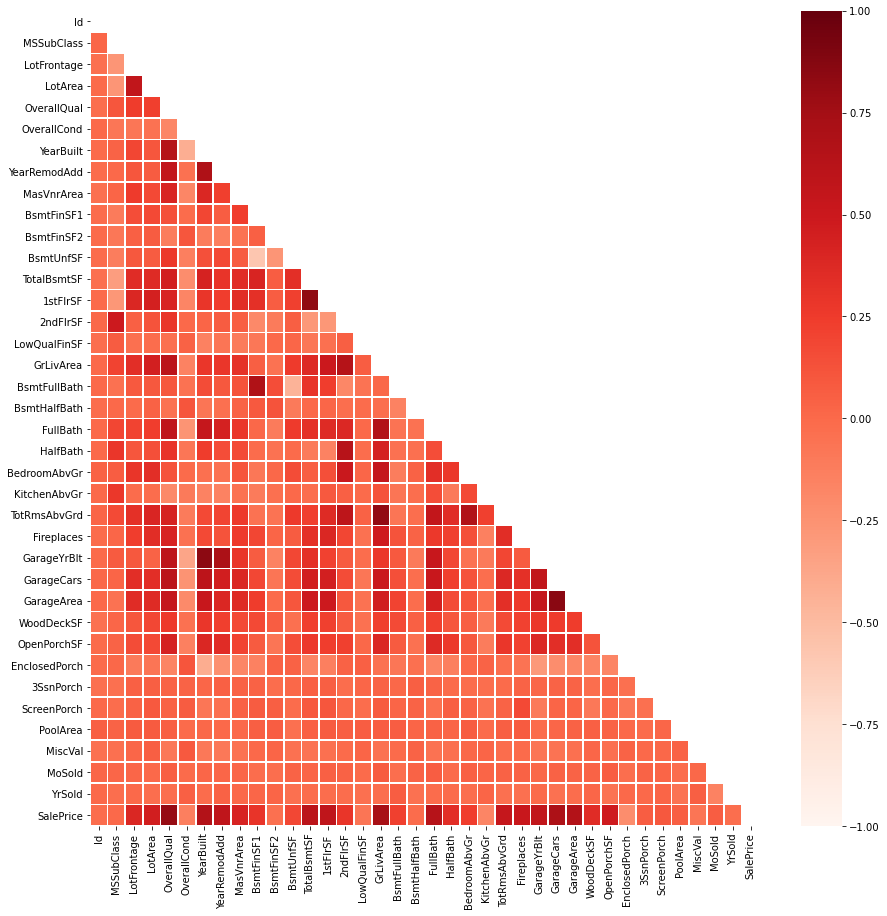

In [17]:
#Просмотр зависимости признаков с 'SalePrice'
mask=np.zeros_like(df_train.corr(method = 'spearman'))
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,15))
sns.heatmap(df_train.corr(method = 'spearman'),linewidths=0.7, cmap = 'Reds', vmin=-1, vmax=1, mask=mask)

In [18]:
#Назначение фичей и таргета
features = [
    'OverallQual',
    'GrLivArea',
    'GarageCars', 
    'GarageArea', 
    'TotalBsmtSF',
    '1stFlrSF', 
    'FullBath', 
    'TotRmsAbvGrd',
    'YearBuilt', 
    'YearRemodAdd',
]
target = 'SalePrice'

df_2 = df_train[features+[target]]


In [19]:
#Удаление таргета
df_2 = df_2.drop('SalePrice', axis= 1)

In [20]:
df_2

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [21]:
#Перевод данный в формат numpy массива
x, y = df_train[features].to_numpy(), df_train['SalePrice'].to_numpy()
x.shape, y.shape

((1460, 10), (1460,))

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [23]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [24]:
#Разбивка на трейн и тест
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((1022, 10), (438, 10), (1022,), (438,))

In [25]:
#Нормализация данных
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_valid_norm = scaler.transform(x_valid)
x_train_norm.shape, x_valid_norm.shape

((1022, 10), (438, 10))

# Группа снижение размерности данных

In [26]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

In [27]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   GrLivArea     1460 non-null   int64
 2   GarageCars    1460 non-null   int64
 3   GarageArea    1460 non-null   int64
 4   TotalBsmtSF   1460 non-null   int64
 5   1stFlrSF      1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   YearBuilt     1460 non-null   int64
 9   YearRemodAdd  1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [28]:
#Замена int на среднее значение
for col in df_2.columns:
    if df_2[col].dtype in ['int64'] and df_2[col].isna().sum() != 0:
        df_2[col].fillna(df_2[col].mean(), inplace=True)

In [ ]:
#Просмотр зависимости качества дома от других парамметрах
sns.pairplot(df_2, 
             x_vars=list(df_ext.columns[2:-1]), 
             y_vars=list(df_ext.columns[2:-1]), 
             hue= 'OverallQual')

In [30]:
X = df_2[df_2.columns[2:-1]]

In [31]:
X = StandardScaler().fit_transform(X)

In [32]:
#Обучение
pca = PCA(2)
tsne = TSNE(2, perplexity=70)
umap = UMAP(n_components=2, n_neighbors=50)

X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)
X_umap = umap.fit_transform(X)

Text(0.5, 1.0, 'UMAP')

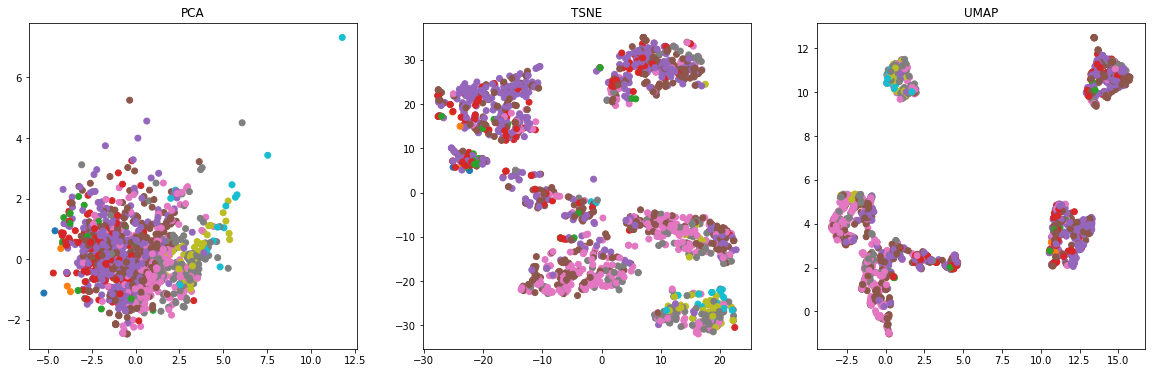

In [33]:
#Вывод графика
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

colors = [sns.color_palette()[x] for x in df_2.OverallQual.map({1:0, 2:1,3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9})]

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors)
ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=colors)

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

In [34]:
from time import time

In [35]:
#Просмотр времени работы группы cнижения размерности
pca = PCA(2)
tsne = TSNE(2, perplexity=30, )
umap = UMAP(n_components=2, n_neighbors=10)

start_t = time()
X_pca = pca.fit_transform(X)
end_t = time()
print(f'PCA time: {end_t - start_t}')

start_t = time()
X_tsne = tsne.fit_transform(X)
end_t = time()
print(f'TSNE time: {end_t - start_t}')

start_t = time()
X_umap = umap.fit_transform(X)
end_t = time()
print(f'UMAP time: {end_t - start_t}')

PCA time: 0.0029685497283935547
TSNE time: 10.034390926361084
UMAP time: 6.063023805618286


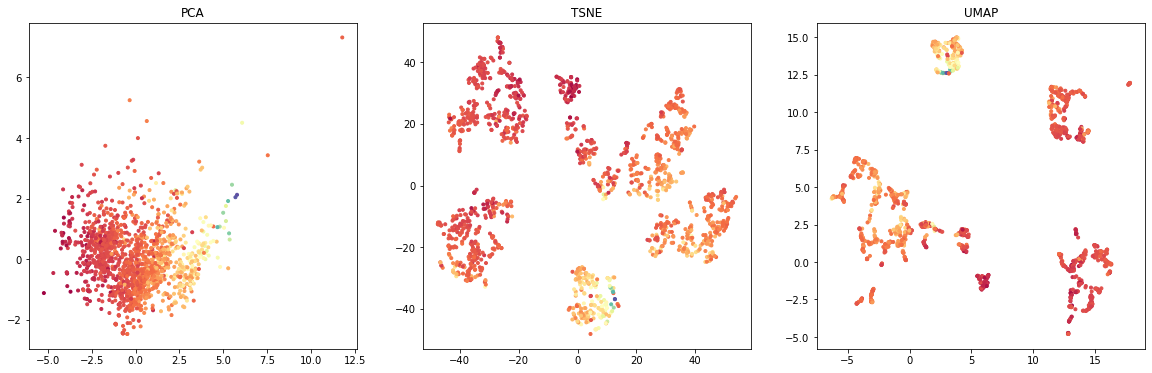

In [36]:
#Вывод графика
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

cm = 'Spectral'

ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cm, marker='.')
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cm, marker='.')
ax3.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=cm, marker='.')

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP');

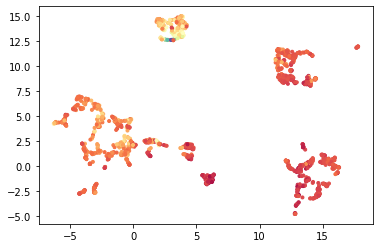

In [37]:
#Вывод наилучшего графика
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap=cm, marker='.')

In [38]:
df_2


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


# Random Forest Regressor

In [39]:
#Случайный лес
rf_3 = RandomForestRegressor(n_estimators =3)
rf_100 = RandomForestRegressor(n_estimators= 100)
rf_200 = RandomForestRegressor(n_estimators= 200)
rf_300 = RandomForestRegressor(n_estimators= 300)

In [40]:
#Обучение модели,вывод результата
rf_3.fit (x_train,y_train)
rf_100.fit (x_train,y_train)
rf_200.fit (x_train,y_train)
rf_300.fit (x_train,y_train)

print('3 trees' , mean_squared_error(y_valid, rf_3.predict(x_valid)))
print('100 trees' ,mean_squared_error(y_valid, rf_100.predict(x_valid)))
print('200 trees' , mean_squared_error(y_valid, rf_200.predict(x_valid)))
print('300 trees' , mean_squared_error(y_valid, rf_300.predict(x_valid)))

3 trees 1107829525.8165693
100 trees 768088494.7920877
200 trees 751681848.8359865
300 trees 767854400.9406035


# Stacking Regressor

In [41]:
from sklearn.ensemble import StackingRegressor

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [43]:
stacked_model_1 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= RandomForestRegressor())

In [44]:
#Обучение модели
stacked_model_1.fit(x_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=RandomForestRegressor())

In [67]:
y_pred_sm1 = stacked_model_1.predict(x_valid)

In [46]:
stacked_model_2 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= LinearRegression())

In [47]:
#Обучение 2 модели
stacked_model_2.fit(x_train,y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor()), ('svr', SVR())],
                  final_estimator=LinearRegression())

In [48]:
y_pred_sm2 = stacked_model_2.predict(x_valid)

In [49]:
#Вывод результата
print(f'Stacked model 1: {mean_squared_error(y_valid , y_pred_sm1)**.5}')

print(f'Stacked model 2: {mean_squared_error(y_valid , y_pred_sm2)**.5}')

Stacked model 1: 30782.416005405157
Stacked model 2: 35563.288723581565


# Voting Regressor

In [50]:
from sklearn.ensemble import VotingRegressor

In [51]:
#Обучение модели
vr = VotingRegressor(estimators= [('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                              ('svr',SVR())], weights = [1,.1,0]) 
vr.fit(x_train,y_train)
vr_pred = vr.predict(x_valid)  


In [52]:
stacked_model_3 = StackingRegressor(estimators=[('lr',LinearRegression()),
                                              ('knn', KNeighborsRegressor()),
                                             ('svr',SVR())],
                                  final_estimator= RandomForestRegressor(n_estimators= 300))
stacked_model_3.fit(x_train,y_train)
y_pred_sm_3 = vr.predict(x_valid)      

In [53]:
#Вывод результата
print(f'Voting mse:{mean_squared_error(y_valid, y_pred_sm_3)}')

Voting mse:1265690231.042747


# Cat Boost Regressor

In [54]:
from catboost import CatBoostRegressor

In [55]:
cbr = CatBoostRegressor(iterations=1000, depth=5)

In [56]:
#Обучение модели
cbr.fit (x_train, y_train, verbose = 0)
y_pred_cbr = cbr.predict(x_valid)

In [57]:
#Вывод результата
print(f'CatBoost RMSE: {mean_squared_error(y_valid, y_pred_cbr)**.5}')

CatBoost RMSE: 25883.831554804165


In [66]:
# Выводим график catboost для RMSE
from catboost import Pool, cv
params = {"iterations": 100,
          "depth": 2,
          "loss_function": "RMSE",
          "verbose": False}
cv_dataset = Pool(data=x_train_norm,
                  label=y_train)
scores = cv(cv_dataset,
            params,
            fold_count=2,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
df_test_2 = df_test[features]

In [59]:
y_test = cbr.predict(df_test_2.values)


In [60]:
df_test_2.shape

(1459, 10)

In [61]:
df_test_2

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992
...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,0.0,0.0,546.0,546,1,5,1970,1970
1455,4,1092,1.0,286.0,546.0,546,1,6,1970,1970
1456,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996
1457,5,970,0.0,0.0,912.0,970,1,6,1992,1992


In [62]:
y_test.shape

(1459,)

In [63]:
!head sample_submission.csv
!wc -l sample_submission.csv

Id,SalePrice
1461,169277.0524984
1462,187758.393988768
1463,183583.683569555
1464,179317.47751083
1465,150730.079976501
1466,177150.989247307
1467,172070.659229164
1468,175110.956519547
1469,162011.698831665
1460 sample_submission.csv


In [69]:
df_test['SalePrice'] = y_test
df_test[['Id','SalePrice']].to_csv('submission_11.csv', index=False)
